In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image
from numpy import asarray

In [2]:
train_label = pd.read_csv('dataset/glaucoma.csv')
y_train = train_label['Glaucoma']
train_label.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [3]:
image = Image.open('dataset/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive/613.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

JPEG
RGB
(3072, 2048)


In [4]:
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Mean: 73.462
Min: 0.000, Max: 255.000
Mean: 0.000
Min: -73.462, Max: 181.538
[[[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 [[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 [[-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  [-71.46201356 -71.46201356 -73.46201356]
  ...
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]
  [-72.46201356 -72.46201356 -73.46201356]]

 ...

 [[-73.46201356 -73.46201356 -73.46201356]
  [-73.46201356 -73.46201356 -73.46201356]
  [-73.46201356 -73.46201356 -73.

In [5]:
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
mean = pixels.mean()
print('pixel mean = ', mean)

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Data Type: float64
Min: -73.462, Max: 181.538
pixel mean =  1.3986008e-09
Min: -0.288, Max: 0.712
[[[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 [[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 [[-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  [-0.2802432  -0.2802432  -0.28808632]
  ...
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]
  [-0.28416476 -0.28416476 -0.28808632]]

 ...

 [[-0.28808632 -0.28808632 -0.28808632]
  [-0.28808632 -0.28808632 -0.28808632]
  [-0.28808632 -0.28808632 -0.28808632]
  ...
  [-0.28416476 -0.28416476

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


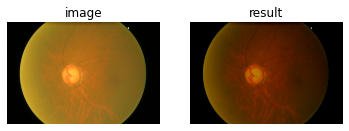

In [6]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('result')
plt.show()

In [7]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [9]:
TRAIN_DIR = 'dataset/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'

TEST_DIR = 'dataset/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model 
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 25
BATCH_SIZE = 8

def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)



resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam(lr = 0.00001)
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]

print(train_generator.class_indices)

resnet50_model.summary()

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
1024
512
256
{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )              

In [12]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 25, 
                                       shuffle = True, validation_data = test_generator)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
25/25 [==============================] - 92s 3s/step - loss: 1.3949 - accuracy: 0.6750 - val_loss: 0.8591 - val_accuracy: 0.7385
Epoch 2/25
25/25 [==============================] - 76s 3s/step - loss: 1.4416 - accuracy: 0.6250 - val_loss: 0.8344 - val_accuracy: 0.7385
Epoch 3/25
25/25 [==============================] - 77s 3s/step - loss: 1.1986 - accuracy: 0.7200 - val_loss: 0.9324 - val_accuracy: 0.7385
Epoch 4/25
25/25 [==============================] - 75s 3s/step - loss: 1.2173 - accuracy: 0.7100 - val_loss: 0.7386 - val_accuracy: 0.7385
Epoch 5/25
25/25 [==============================] - 74s 3s/step - loss: 1.2777 - accuracy: 0.6700 - val_loss: 0.7286 - val_accuracy: 0.7308
Epoch 6/25
25/25 [==============================] - 74s 3s/step - loss: 1.3679 - accuracy: 0.5900 - val_loss: 0.6174 - val_accuracy: 0.7385
Epoch 7/25
25/25 [==============================] - 74s 3s/step - loss: 0.9420 - accuracy: 0.7650 - val_loss: 0.6444 - val_accuracy: 0.7385
Epoch 8/25
25/25 [==

8
[1. 0.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


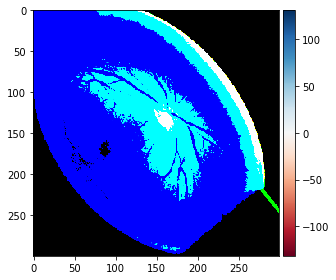

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


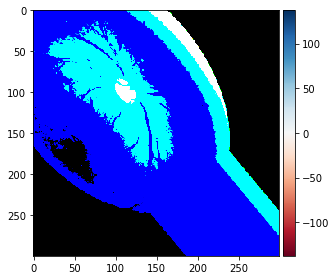

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


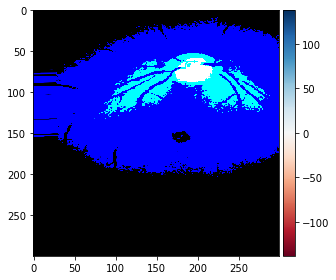

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


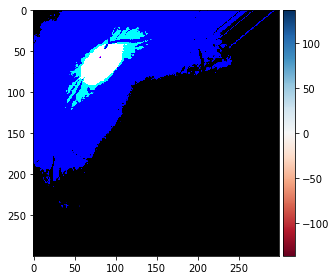

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


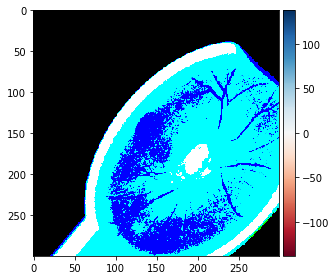

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


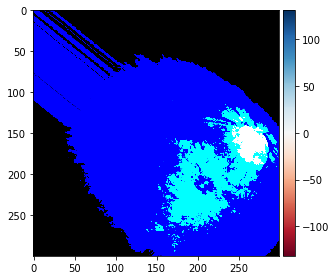

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


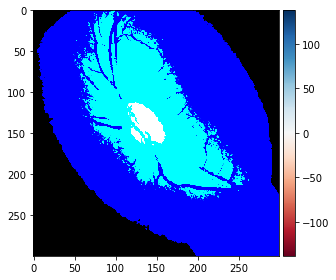

[1. 0.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


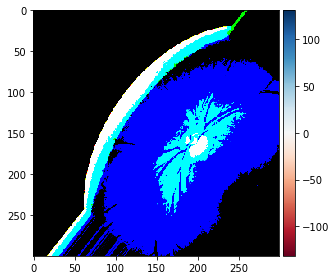

In [13]:
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

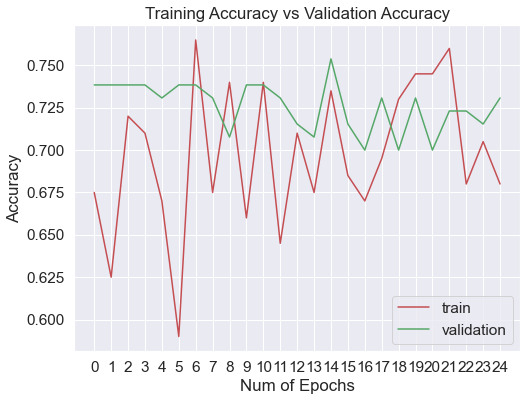

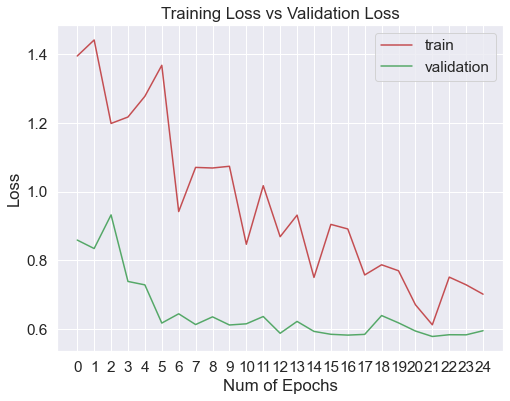

In [61]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 25, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 25, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

 
plt.show()

In [19]:
resnet50_model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.570409893989563, 0.7230769395828247]

In [20]:
pred = resnet50_model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


17/17 [==============================] - 25s 1s/step


Confusion Matrix


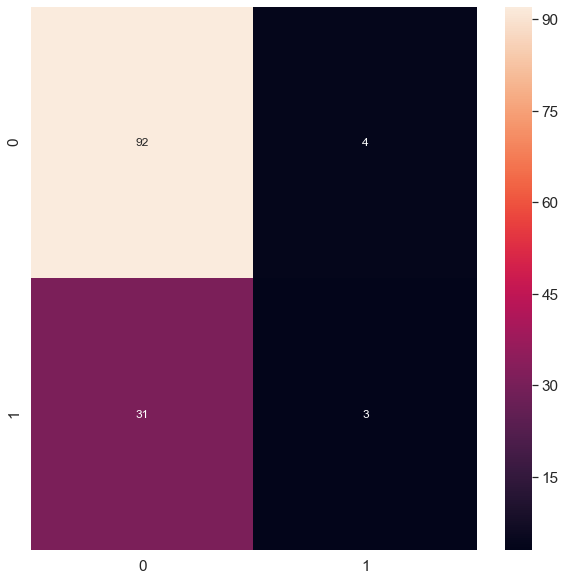


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        96
           1       0.43      0.09      0.15        34

    accuracy                           0.73       130
   macro avg       0.59      0.52      0.49       130
weighted avg       0.66      0.73      0.66       130



In [51]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, np.argmax(pred, axis=1))
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
print('Classification Report')
print(classification_report(test_generator.classes, predicted))